In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("grade_data.csv")

values_to_print = dataset.sample(10)

print(values_to_print)

    Student_ID  Hours_Studied  Test_Score
45          46       6.706379   82.035548
41          42       4.370320   60.857590
9           10       3.834415   79.716593
5            6       6.458941  101.253597
22          23       4.614794   60.369118
46          47       2.103826   56.167593
98          99       8.289400   86.891676
35          36       6.176355   88.906339
59          60       2.444256   51.290665
33          34       5.684339   97.522347


In [4]:
dataset.dropna(inplace=True)

for x in dataset.index:
  if not 0 <= dataset.loc[x, 'Test_Score'] <= 100:
     dataset.loc[x, 'Test_Score'] = round(dataset['Test_Score'].mean(), 2)


print(dataset)

    Student_ID  Hours_Studied  Test_Score
0            1       5.488135   65.789177
1            2       7.151894   94.767733
2            3       6.027634   84.794793
3            4       5.448832   61.881722
4            5       4.236548   86.065262
..         ...            ...         ...
95          96       1.831914   65.975513
96          97       5.865129   71.291550
97          98       0.201075   44.109880
98          99       8.289400   86.891676
99         100       0.046955   50.409565

[100 rows x 3 columns]


In [5]:
dataset = dataset.drop('Student_ID', axis=1)
print(dataset)

    Hours_Studied  Test_Score
0        5.488135   65.789177
1        7.151894   94.767733
2        6.027634   84.794793
3        5.448832   61.881722
4        4.236548   86.065262
..            ...         ...
95       1.831914   65.975513
96       5.865129   71.291550
97       0.201075   44.109880
98       8.289400   86.891676
99       0.046955   50.409565

[100 rows x 2 columns]


In [6]:
X = dataset.iloc[:, :-1]

Y = dataset.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [11]:
Y_pred = model.predict(X_test)

print(model.predict(np.array([7.412578]).reshape(1, -1)))
print(model.predict(np.array([5]).reshape(1, -1)))
print(model.predict(np.array([10]).reshape(1, -1)))

from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred)
print(score)

[85.22381681]
[75.308563]
[95.85764743]
0.5174826419282157


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


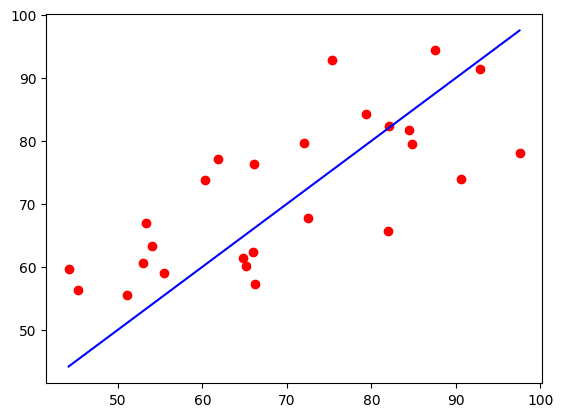

In [12]:
plt.scatter(Y_test, Y_pred, color='red')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='blue')
plt.show()

The grade for a student that studied 5 hours is 75.308563

The grade for a student that studied 10 hours is 95.85764743